<a href="https://colab.research.google.com/github/rajkhatana/Khatana/blob/master/Apple_Stock_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#from google.colab import files
#files.upload()

In [0]:
# last 5 year data of Apple stock market
data = pd.read_csv('AAPL.csv')

In [4]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-19,92.290001,92.300003,91.339996,91.860001,84.191948,35528000
1,2014-06-20,91.849998,92.550003,90.900002,90.910004,83.321236,100898000
2,2014-06-23,91.320000,91.620003,90.599998,90.830002,83.247910,43694000
3,2014-06-24,90.750000,91.739998,90.190002,90.279999,82.743828,39036000
4,2014-06-25,90.209999,90.699997,89.650002,90.360001,82.817154,36869000


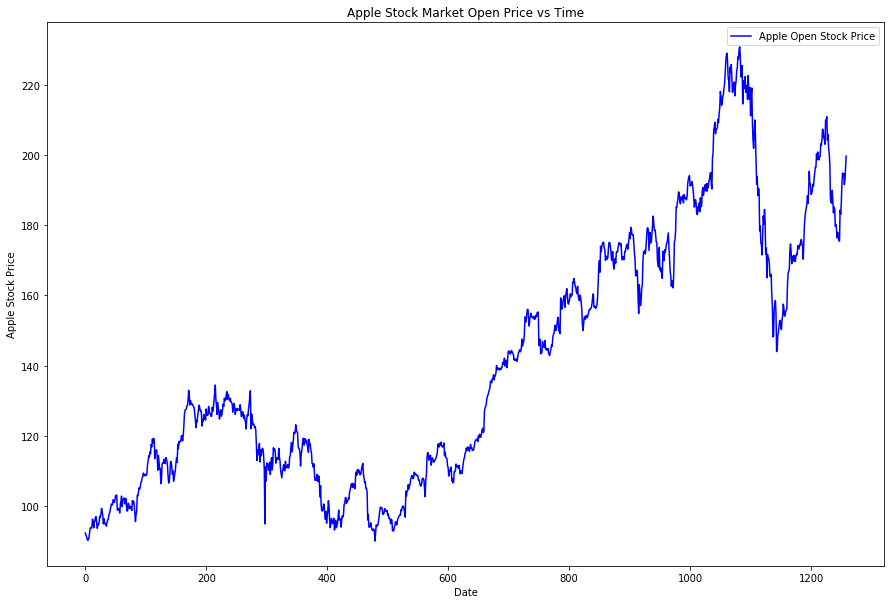

In [5]:
plt.figure(figsize=(15,10))  
plt.plot(data['Open'], color='blue', label='Apple Open Stock Price')  
plt.title('Apple Stock Market Open Price vs Time')  
plt.xlabel('Date')  
plt.ylabel('Apple Stock Price')  
plt.legend()  
plt.show()  

In [6]:
data['Date'] = pd.to_datetime(data['Date']) 
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-06-19,92.290001,92.300003,91.339996,91.860001,84.191948,35528000
1,2014-06-20,91.849998,92.550003,90.900002,90.910004,83.321236,100898000
2,2014-06-23,91.320000,91.620003,90.599998,90.830002,83.247910,43694000
3,2014-06-24,90.750000,91.739998,90.190002,90.279999,82.743828,39036000
4,2014-06-25,90.209999,90.699997,89.650002,90.360001,82.817154,36869000


In [7]:
X = np.array(data['Open'])
X = X.reshape(X.shape[0],1)
X.shape

(1259, 1)

In [0]:
from sklearn.preprocessing import MinMaxScaler  
scaler = MinMaxScaler(feature_range = (0, 1))
X = scaler.fit_transform(X) 

In [0]:
train = X[:1000]
test = X[1000:]

In [10]:
print(train.shape,'\n',test.shape)

(1000, 1) 
 (259, 1)


In [0]:
#Create X_train using 30 timesteps for each sample
X_train = []
y_train = []
for i in range(30, train.shape[0]):
    X_train.append(train[i-30:i, 0])
    y_train.append(train[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)


In [12]:
print(X_train.shape,'\n',y_train.shape)

(970, 30) 
 (970,)


In [13]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  
X_train.shape

(970, 30, 1)

In [0]:
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense  
from tensorflow.keras.layers import LSTM  
from tensorflow.keras.layers import Dropout  

In [0]:
from tensorflow.keras import backend

In [0]:
model = Sequential()  

In [17]:
# Training LSTM model

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
lstm_model = Sequential()
lstm_model.add(LSTM(8, input_shape=(X_train.shape[1], 1), activation='relu',kernel_initializer='lecun_uniform'))
lstm_model.add(Dense(1))

W0620 15:55:51.675634 140409779812224 deprecation.py:506] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [0]:
lstm_model.compile(optimizer = 'adam', loss = 'mean_squared_error')
 

In [19]:
lstm_model.fit(X_train, y_train, epochs = 35, batch_size = 4)

W0620 15:55:51.864358 140409779812224 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/35
970/970 [==============================] - 13s 13ms/sample - loss: 0.0073
Epoch 2/35
970/970 [==============================] - 11s 12ms/sample - loss: 9.7371e-04
Epoch 3/35
970/970 [==============================] - 11s 12ms/sample - loss: 8.4407e-04
Epoch 4/35
970/970 [==============================] - 11s 12ms/sample - loss: 7.3923e-04
Epoch 5/35
970/970 [==============================] - 11s 12ms/sample - loss: 6.8547e-04
Epoch 6/35
970/970 [==============================] - 12s 12ms/sample - loss: 6.1753e-04
Epoch 7/35
970/970 [==============================] - 11s 12ms/sample - loss: 5.7384e-04
Epoch 8/35
970/970 [==============================] - 11s 12ms/sample - loss: 5.3896e-04
Epoch 9/35
970/970 [==============================] - 11s 12ms/sample - loss: 5.3765e-04
Epoch 10/35
970/970 [==============================] - 11s 12ms/sample - loss: 4.9686e-04
Epoch 11/35
970/970 [==============================] - 11s 12ms/sample - loss: 4.7429e-04
Epoch 12/35
970/970 [==

In [20]:
# Create X_test using 30 timesteps for each sample
X_test = []
y_test = []

for i in range(30, test.shape[0]):
    X_test.append(test[i-30:i, 0])
    y_test.append(test[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
print(X_test.shape)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_train.shape)

(229, 30)
(970, 30, 1)


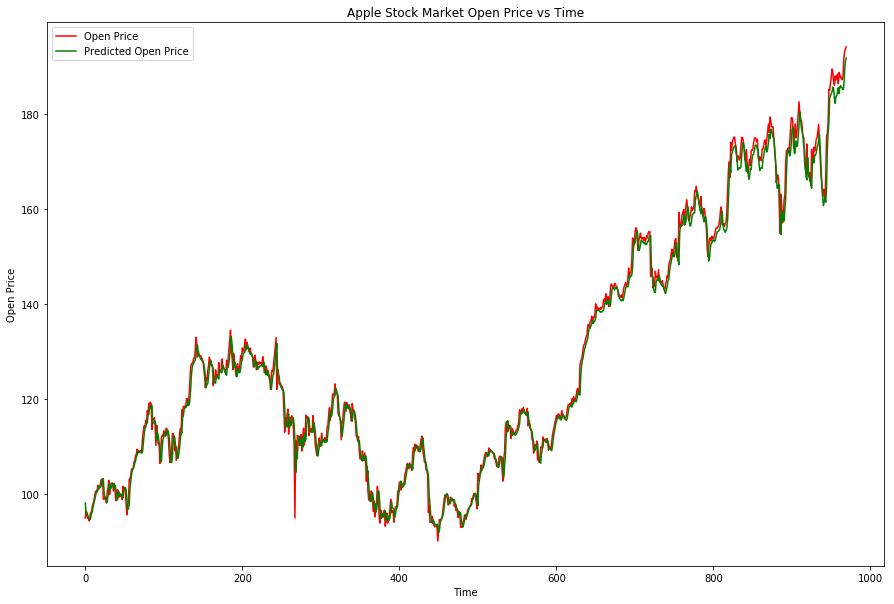

In [21]:
# plot predictions vs real turnover on training set
plt.figure(figsize=(15,10))
predicted = lstm_model.predict(X_train)
predicted = scaler.inverse_transform(predicted)
plt.plot(scaler.inverse_transform(train[-970:]), color = 'red', label = 'Open Price')
plt.plot(predicted, color = 'green', label = 'Predicted Open Price')
plt.title('Apple Stock Market Open Price vs Time')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()

In [22]:
X_test.shape

(229, 30, 1)

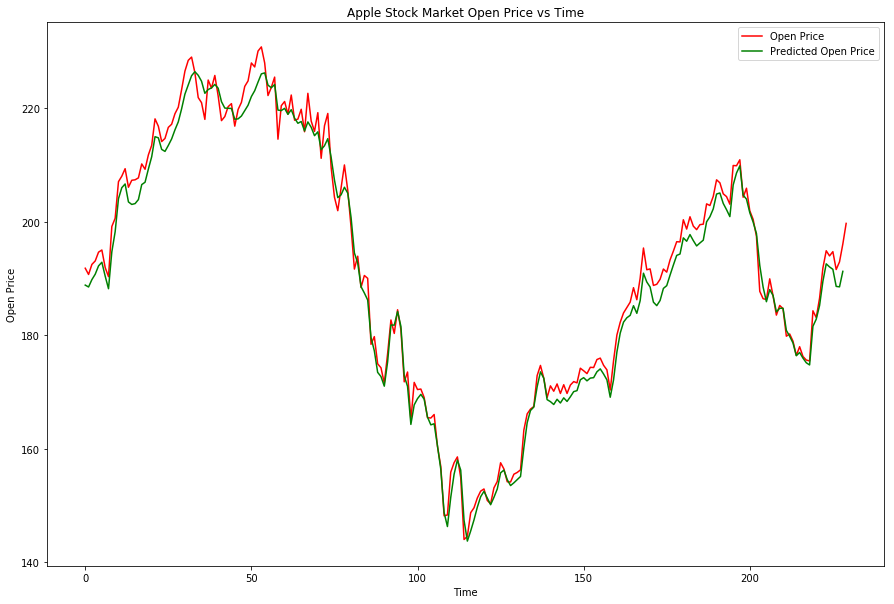

In [23]:
# plotting predictions vs true turnover for the test set
plt.figure(figsize=(15,10))
predicted = lstm_model.predict(X_test)
predicted = scaler.inverse_transform(predicted)
plt.plot(scaler.inverse_transform(test[-230:]), color = 'red', label = 'Open Price')
plt.plot(predicted, color = 'green', label = 'Predicted Open Price')
plt.title('Apple Stock Market Open Price vs Time')
plt.xlabel('Time')
plt.ylabel('Open Price')
plt.legend()
plt.show()